# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset [(Download Here)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here)
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?


In [19]:
# Add code here 🔧

#import tables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse



In [2]:
# Data upload
url= 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv'
df = pd.read_csv(url, engine='python')
display(df.head())


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
display(df.sort_values(by='adr', ascending=False).head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,NaN,0,Transient,510.0,0,0,Check-Out,2017-05-10
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,NaN,NaN,0,Transient,508.0,1,0,Check-Out,2015-07-16
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,NaN,NaN,0,Transient-Party,451.5,0,4,Check-Out,2017-01-02
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,No Deposit,314.0,NaN,0,Transient,450.0,0,0,Canceled,2016-07-22


### ✍️ Your Response: 🔧
1. There's missing data in agent and company columns. There are rows with stays_in_weekend_nights and	stays_in_week_nights both having a 0 implies that there was no nightly stay but we interpret that as being a same day check in/check out. Some of the columns data types should be changed based on the data table description, for example is_canceled should be a category and agent/company should be a object since they have a unique ID.



## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


In [4]:
# Add code here 🔧

# Select and scale features
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests', 'adr']
segment_df = df[features].copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(segment_df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=features)
scaled_df.head()


,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_of_special_requests,adr
0,2.227051,-0.92889,-1.310240,-0.720694,-2.015038
1,5.923385,-0.92889,-1.310240,-0.720694,-2.015038
2,-0.907814,-0.92889,-0.786207,-0.720694,-0.530935
3,-0.851667,-0.92889,-0.786207,-0.720694,-0.530935
4,-0.842309,-0.92889,-0.262174,0.540666,-0.075810


In [5]:
display(scaled_df.sort_values(by=list(scaled_df.columns), ascending=False).head())

,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_of_special_requests,adr
1,5.923385,-0.928890,-1.310240,-0.720694,-2.015038
4182,5.661366,7.082251,9.170415,-0.720694,-0.669452
65237,4.912742,-0.928890,-0.262174,-0.720694,-0.788180
65238,4.912742,-0.928890,-0.262174,-0.720694,-0.788180
65239,4.912742,-0.928890,-0.262174,-0.720694,-0.788180


### ✍️ Your Response: 🔧
1. Lead_time, Stays_in_weekend_nights, stays_in_week_nights, total_of_special_requests and adr as the features that I wanted to scale. I choose these because they are related to customer behavior.

2. You'll be able to segment based off a customer being a last minute planner, proactive planner or highly demanding customer. Would allow for the business to target marketing/promotions based on those segments.


## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



In [21]:
# Add code here 🔧
# Select only the standardized property features
X_feat = scaled_df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests', 'adr']]

# Filtering outlier in ADR
X_feat_filtered = X_feat[X_feat['adr'] < 80].copy()

# Apply KMeans clustering with 4 clusters
kmeans_feat = KMeans(n_clusters=4, random_state=1)
kmeans_feat.fit(X_feat_filtered)

filtered_scaled_df = scaled_df[scaled_df['adr'] < 80].copy()
filtered_scaled_df['feature_cluster'] = kmeans_feat.fit_predict(X_feat_filtered)


# Show number of listings in each cluster
filtered_scaled_df['feature_cluster'].value_counts()


,count
feature_cluster,
3,54170
1,27940
0,21486
2,15793


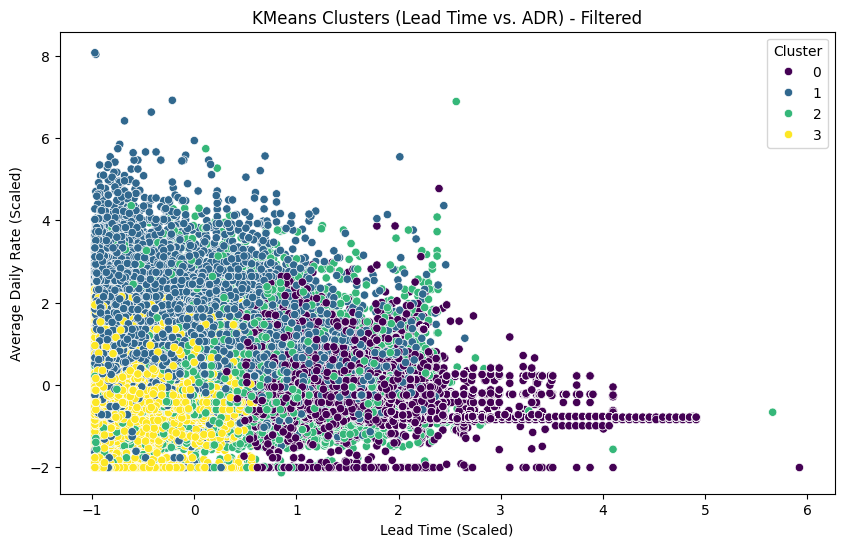

In [22]:
# Scatterplot of two features with filtered scaled df
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_scaled_df,
                x='lead_time',
                y='adr',
                hue='feature_cluster',
                palette='viridis')

plt.title("KMeans Clusters (Lead Time vs. ADR) - Filtered")
plt.xlabel("Lead Time (Scaled)")
plt.ylabel("Average Daily Rate (Scaled)")
plt.legend(title='Cluster')
plt.show()

### ✍️ Your Response: 🔧
1.

2.


## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?


In [28]:
# Add code here 🔧
# GMM Clusters
gmm = GaussianMixture(n_components=4, random_state=1)
gmm.fit(X_feat_filtered)

# Predict soft clusters (probabilities)
gmm_probs = gmm.predict_proba(X_feat_filtered)


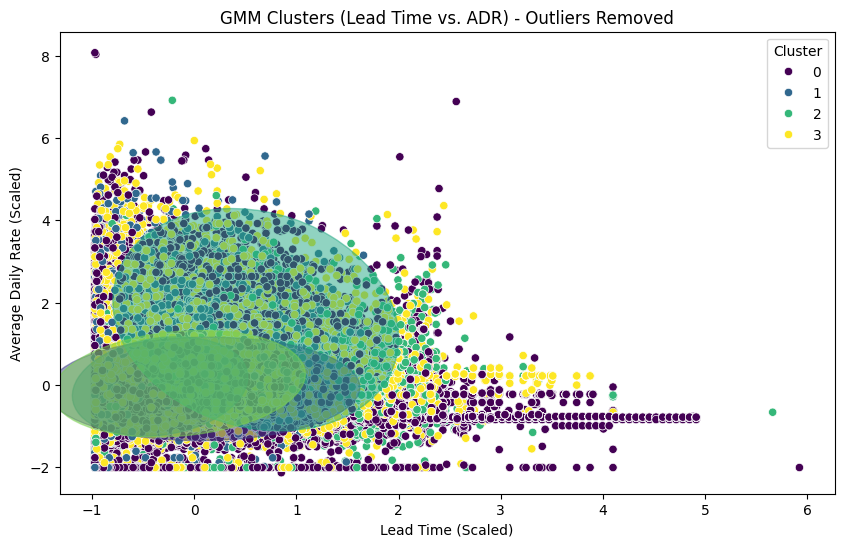

In [30]:
# Function to plot ellipses for GMM
def plot_ellipses(gmm, X, ax):
    for i, (mean, cov, color) in enumerate(zip(gmm.means_, gmm.covariances_, sns.color_palette('viridis', gmm.n_components))):
        v, w = np.linalg.eigh(cov[:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0]) * 180 / np.pi
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = Ellipse(xy=mean[:2], width=v[0], height=v[1], angle=angle, color=color)
        ell.set_alpha(0.5)
        ax.add_patch(ell)

# GMM Cluster scatterplot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=filtered_scaled_df, # Use filtered_scaled_df for plotting
                     x='lead_time',
                     y='adr',
                     hue='gmm_cluster',
                     palette='viridis')

plot_ellipses(gmm, X_feat_filtered, ax) # Use filtered data for ellipses

plt.title("GMM Clusters (Lead Time vs. ADR) - Outliers Removed")
plt.xlabel("Lead Time (Scaled)")
plt.ylabel("Average Daily Rate (Scaled)")
plt.legend(title='Cluster')
plt.show()

### ✍️ Your Response: 🔧
1.

2.


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


In [33]:
# Add code here 🔧
# WCSS
inertia = kmeans_feat.inertia_
print(f"WCSS: {inertia}")

# Silhouette score
silhouette_avg = silhouette_score(X_feat_filtered, filtered_scaled_df['feature_cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_feat_filtered, filtered_scaled_df['feature_cluster'])
print(f"Davies-Bouldin Index: {db_index}")


WCSS: 335407.84551872365
Silhouette Score: 0.2328678383082944
Davies-Bouldin Index: 1.409178450641486


### ✍️ Your Response: 🔧
1.

2.


## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


In [34]:
# Add code here 🔧

filtered_scalaed_df.groupby('gmm_cluster')[['lead_time', 'stays_in_weekend_nights',
                                           'stays_in_week_nights', 'total_of_special_requests', 'adr']].mean()


,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_of_special_requests,adr
gmm_cluster,,,,,
0,0.093304,-0.102810,-0.108636,-0.720694,-0.135056
1,-0.336592,-0.045948,-0.078168,1.931672,0.350382
2,0.659749,1.699283,2.153904,1.794127,0.062456
3,-0.148844,0.020920,-0.011602,0.540666,0.137329


### ✍️ Your Response: 🔧
1.

2.


## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1.

2.

3.

4.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [ ]:
!jupyter nbconvert --to html "assignment_09_LastnameFirstname.ipynb"